In [4]:
# use randomforest model
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Function to handle outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


# Load the dataset
df = pd.read_csv(r'C:\Users\nh013\Desktop\traffic control.csv\traffic.csv')

# Feature selection
df = df[['DateTime','Junction','Vehicles','ID']]

# Identify missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Fill missing values with mean or median
mean = df.mean()
df.fillna(mean, inplace=True)

# Fill missing values with mode
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)

# Fill missing values with forward fill
df.fillna(method='ffill', inplace=True)

# Fill missing values with backward fill
df.fillna(method='bfill', inplace=True)


# One-hot encode categorical variable 'Junction'
df = pd.get_dummies(df, columns=['Junction'])

# Handle outliers
df = handle_outliers(df, 'Vehicles')

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Data transformation
scaler = MinMaxScaler()
df[['Vehicles']] = scaler.fit_transform(df[['Vehicles']])

# Normalize and scale all numerical columns
scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Calculate rolling mean and standard deviation for 'Vehicles' column
df['Average_rolling_mean'] = df['Vehicles'].rolling(window=30).mean()
df['Average_rolling_std'] = df['Vehicles'].rolling(window=30).std()

# Drop rows with NaN values after calculating rolling mean and std
df.dropna(inplace=True)

# Split data into training and testing sets
X = df.drop(['Vehicles', 'DateTime', 'ID'], axis=1)
y = df['Vehicles']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a random forest regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Calculate and print mean absolute error and root mean squared error
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: {:.2f}".format(mse))
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)


DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_10904\1558236118.py:31: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df.mean()


Mean squared error: 0.26
Mean Absolute Error: 0.3557345230395244
Root Mean Squared Error: 0.5113852145595467


DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_10904\3392711212.py:32: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df.mean()


Mean Absolute Error: 0.3576061041113305


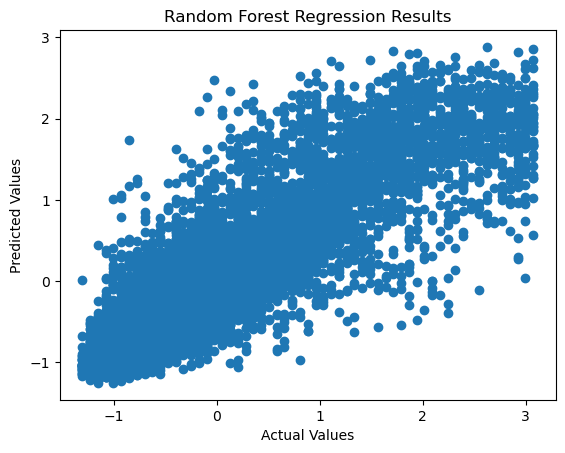

In [8]:


import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Function to handle outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


# Load the dataset
df = pd.read_csv(r'C:\Users\nh013\Desktop\traffic control.csv\traffic.csv')

# Feature selection
df = df[['DateTime','Junction','Vehicles','ID']]

# Identify missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Fill missing values with mean or median
mean = df.mean()
df.fillna(mean, inplace=True)

# Fill missing values with mode
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)

# Fill missing values with forward fill
df.fillna(method='ffill', inplace=True)

# Fill missing values with backward fill
df.fillna(method='bfill', inplace=True)


# One-hot encode categorical variable 'Junction'
df = pd.get_dummies(df, columns=['Junction'])

# Handle outliers
df = handle_outliers(df, 'Vehicles')

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Data transformation
scaler = MinMaxScaler()
df[['Vehicles']] = scaler.fit_transform(df[['Vehicles']])

# Normalize and scale all numerical columns
scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Calculate rolling mean and standard deviation for 'Vehicles' column
df['Average_rolling_mean'] = df['Vehicles'].rolling(window=30).mean()
df['Average_rolling_std'] = df['Vehicles'].rolling(window=30).std()

# Drop rows with NaN values after calculating rolling mean and std
df.dropna(inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['DateTime', 'ID', 'Vehicles'], axis=1), df['Vehicles'], test_size=0.2, random_state=42)

# Train a Random Forest Regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate the mean absolute error of the model
mae = abs(y_pred - y_test).mean()
print("Mean Absolute Error:", mae)

# Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression Results")
plt.show()




Epoch 1/50
890/890 [==============================] - 7s 5ms/step - loss: 0.2720 - val_loss: 0.2410
Epoch 2/50
890/890 [==============================] - 3s 3ms/step - loss: 0.2543 - val_loss: 0.2327
Epoch 3/50
890/890 [==============================] - 3s 3ms/step - loss: 0.2515 - val_loss: 0.2348
Epoch 4/50
890/890 [==============================] - 3s 3ms/step - loss: 0.2502 - val_loss: 0.2358
Epoch 5/50
890/890 [==============================] - 3s 3ms/step - loss: 0.2489 - val_loss: 0.2375
Epoch 6/50
890/890 [==============================] - 2s 3ms/step - loss: 0.2481 - val_loss: 0.2373
Epoch 7/50
890/890 [==============================] - 2s 3ms/step - loss: 0.2470 - val_loss: 0.2323
Epoch 8/50
890/890 [==============================] - 2s 3ms/step - loss: 0.2472 - val_loss: 0.2331
Epoch 9/50
890/890 [==============================] - 2s 3ms/step - loss: 0.2469 - val_loss: 0.2351
Epoch 10/50
890/890 [==============================] - 2s 3ms/step - loss: 0.2467 - val_loss: 0.2348

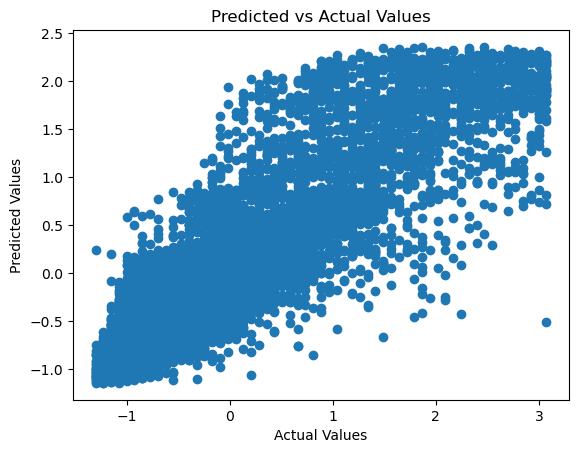

In [9]:
#to train a neural network regression model using TensorFlow and visualize the predicted vs actual values
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'C:\Users\nh013\Desktop\traffic control.csv\traffic.csv')

# Feature selection
df = df[['DateTime','Junction','Vehicles','ID']]

# Identify missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Fill missing values with mean or median
mean = df.mean()
df.fillna(mean, inplace=True)

# Fill missing values with mode
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)

# Fill missing values with forward fill
df.fillna(method='ffill', inplace=True)

# Fill missing values with backward fill
df.fillna(method='bfill', inplace=True)


# One-hot encode categorical variable 'Junction'
df = pd.get_dummies(df, columns=['Junction'])

# Handle outliers
df = handle_outliers(df, 'Vehicles')

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Data transformation
scaler = MinMaxScaler()
df[['Vehicles']] = scaler.fit_transform(df[['Vehicles']])

# Normalize and scale all numerical columns
scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])



# Calculate rolling mean and standard deviation for 'Vehicles' column
df['Average_rolling_mean'] = df['Vehicles'].rolling(window=30).mean()
df['Average_rolling_std'] = df['Vehicles'].rolling(window=30).std()

# Drop rows with NaN values after calculating rolling mean and std
df.dropna(inplace=True)


# Split the data into training and testing sets
X = df.drop(['Vehicles', 'DateTime', 'ID'], axis=1)
y = df['Vehicles']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
#trains a neural network with 2 hidden layers (128 and 64 neurons) 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

#The model is trained for 50 epochs with a batch size of 32. The predicted values are then compared with the actual values 
#and visualized using a scatter plot.

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Predict the values
y_pred = model.predict(X_test)

# Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()
